In [1]:
%matplotlib notebook

1. Import modules on controller
2. Import modules on the worker processes
3. Compute graph - functions to be called in an order on the workers
- (specified via a .yaml file)

1. Have a global instance of Context() class.
2. (Optionally) config_controller() function.
3. config_worker() function (Build the network).

In [3]:
%run simulate_biBTSP_synthetic_network_WD_D.py --plot --framework=serial --interactive --debug

nested: SerialInterface: process id: 16381


In [4]:
locals().update(context())

In [5]:
reward_start_times

[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 65330.0,
 71563.0,
 77796.0,
 84029.0,
 90262.0,
 96495.0,
 102728.0,
 108961.0,
 115194.0,
 121427.0,
 None,
 None,
 None,
 None,
 None,
 None]

<IPython.core.display.Javascript object>


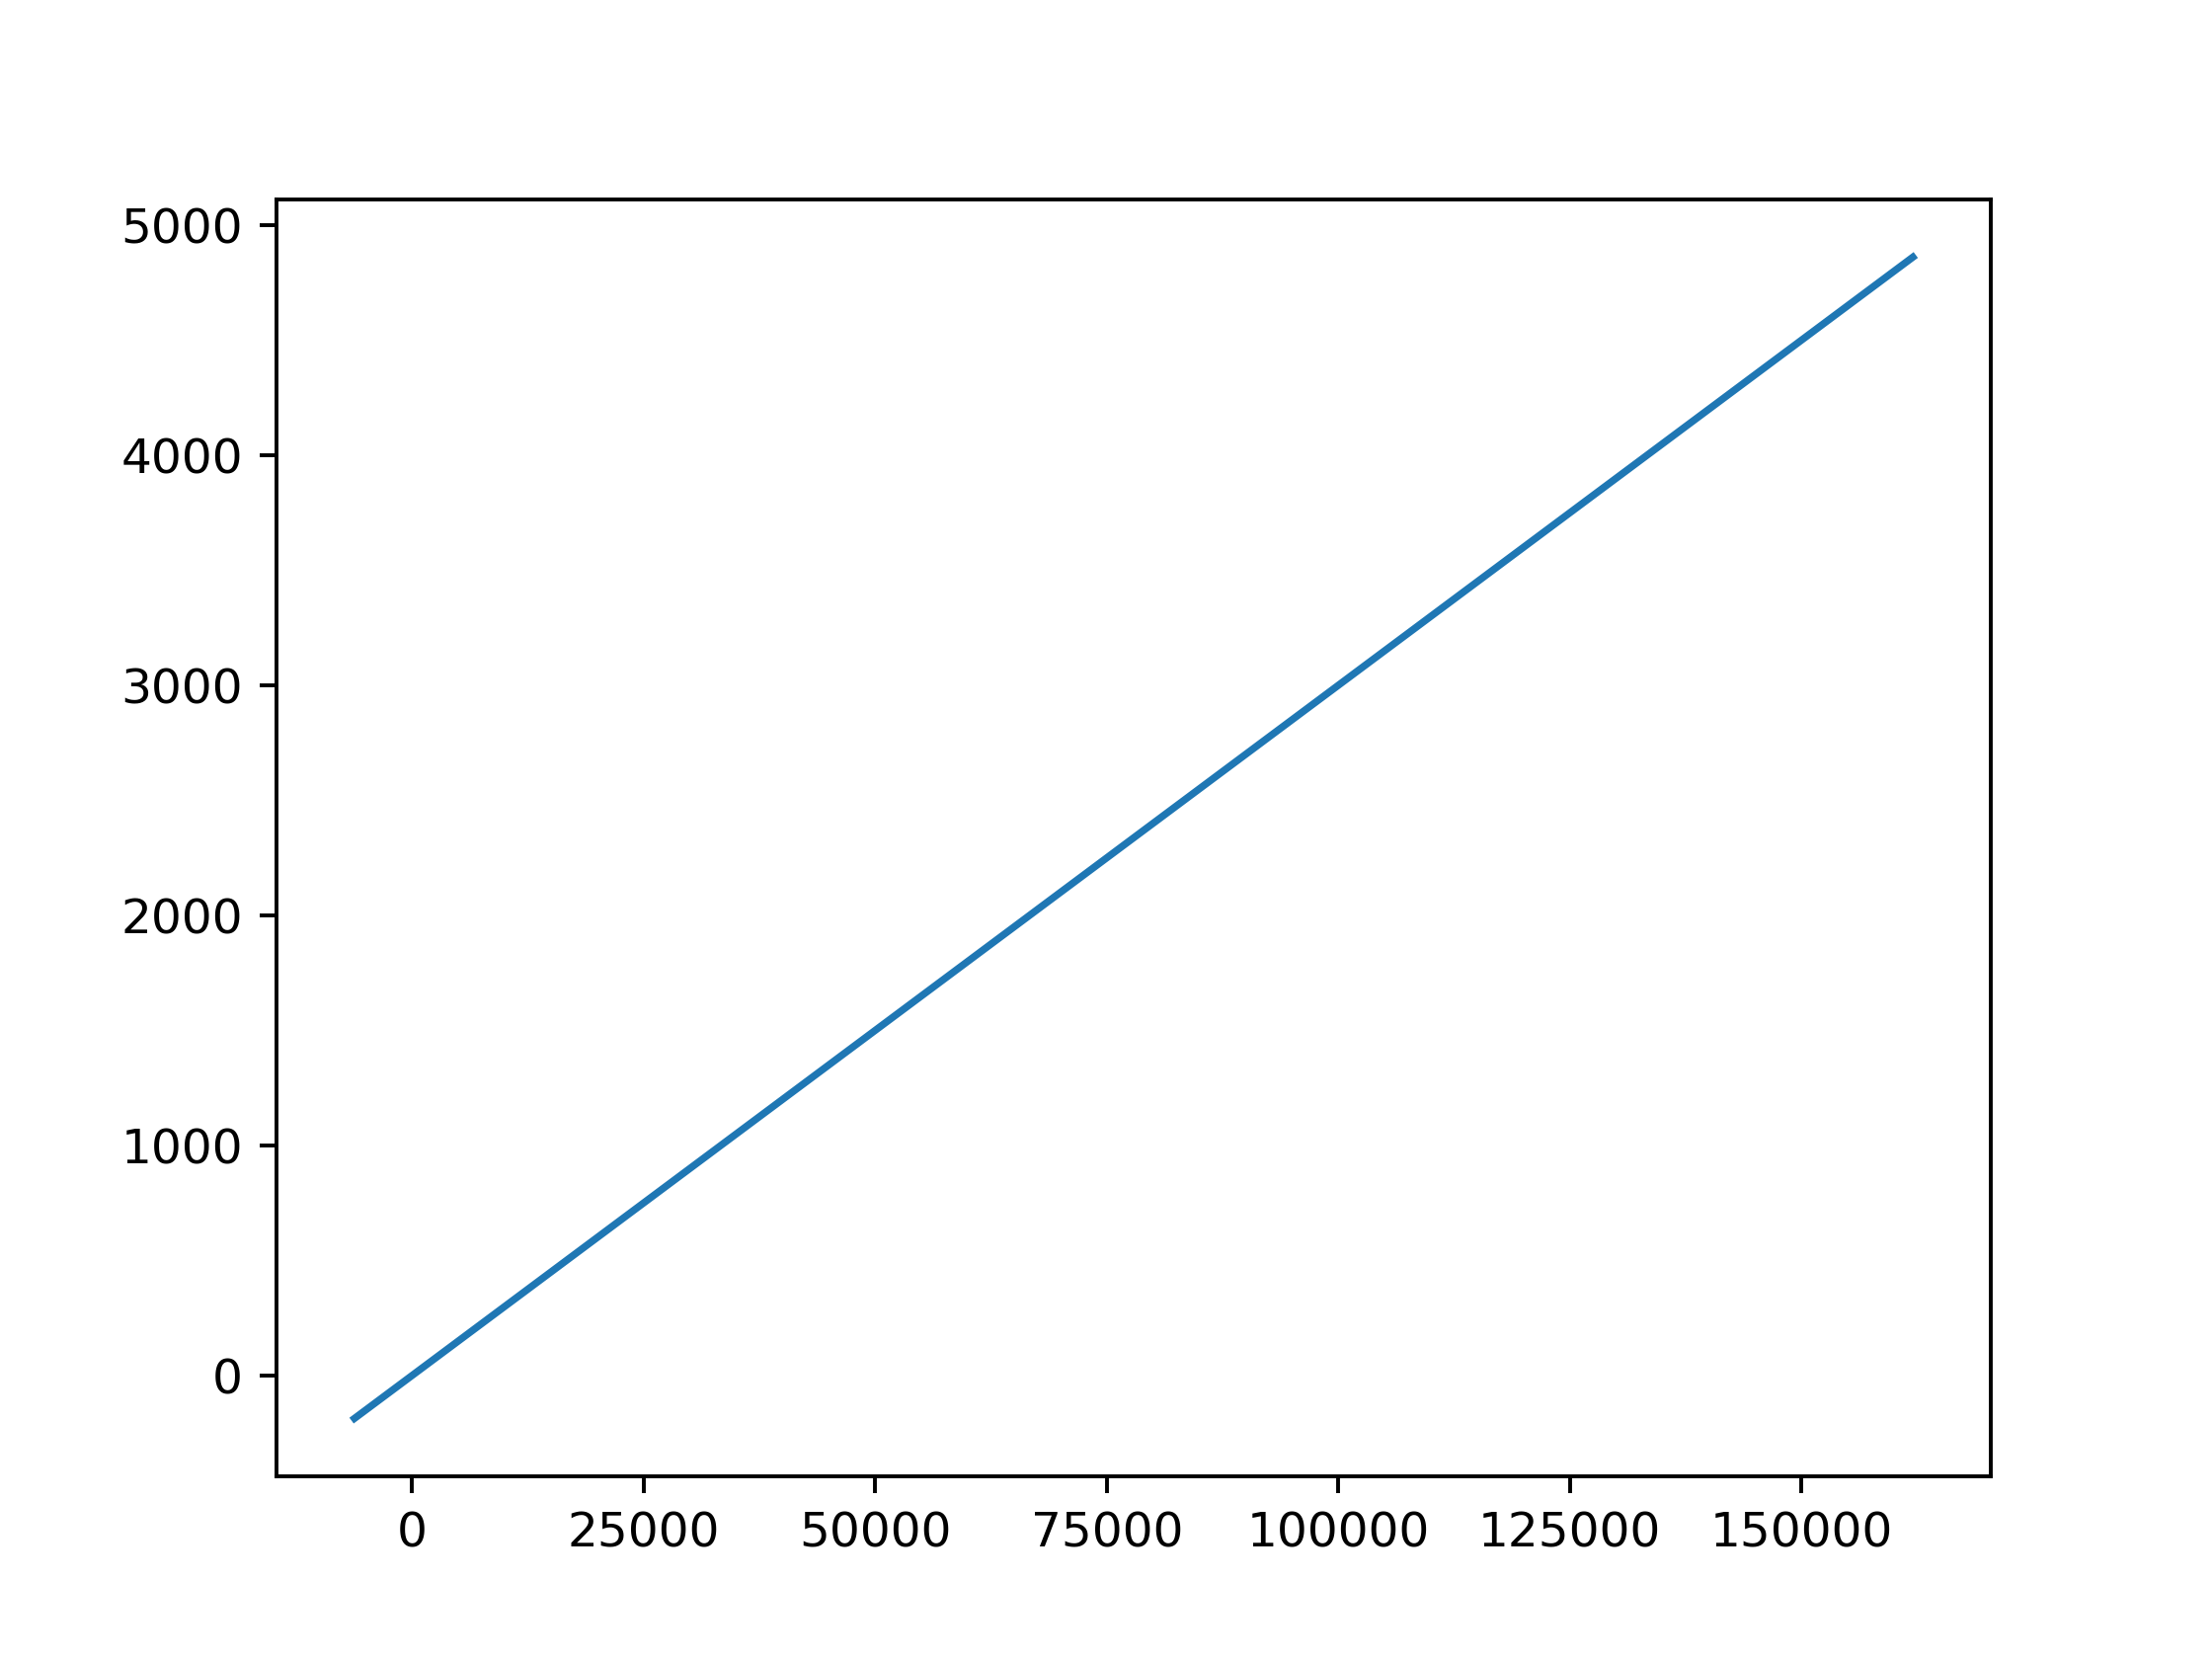

In [9]:
plt.figure()
plt.plot(t, position)

In [10]:
len(complete_rate_maps)

200

<IPython.core.display.Javascript object>


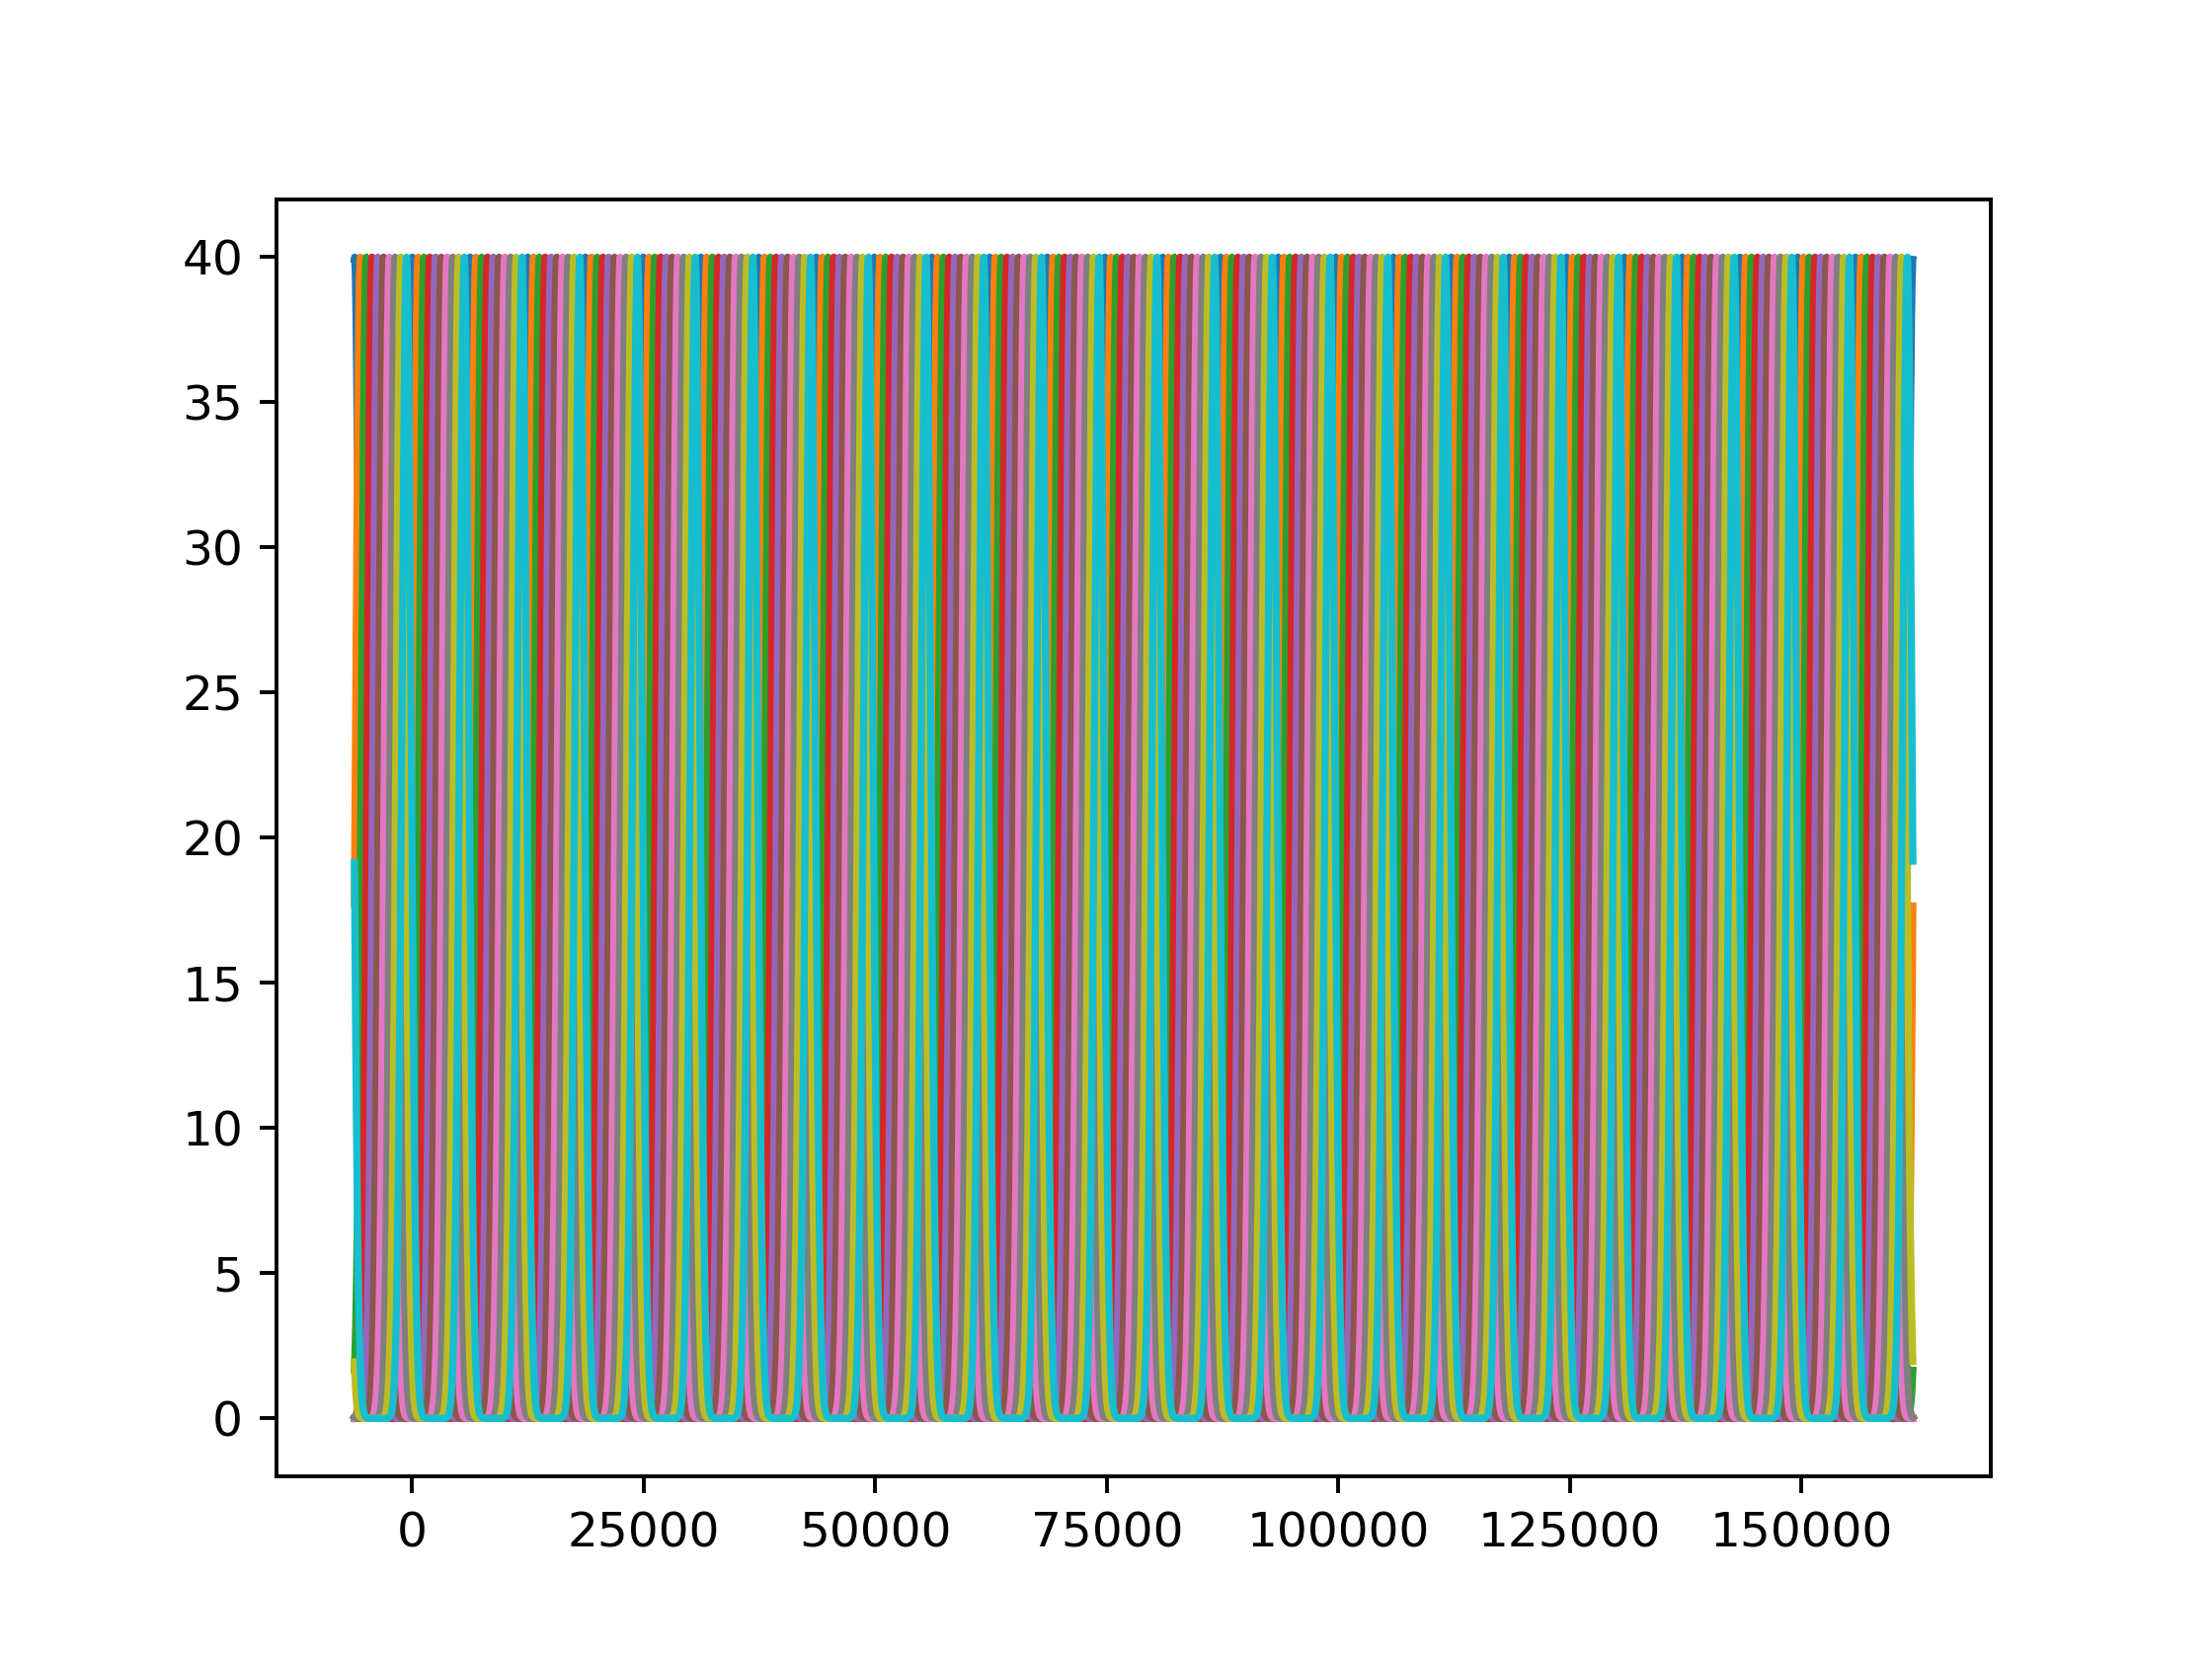

In [13]:
plt.figure()
for rate_map in complete_rate_maps[::20]:
    plt.plot(t, rate_map)

<IPython.core.display.Javascript object>


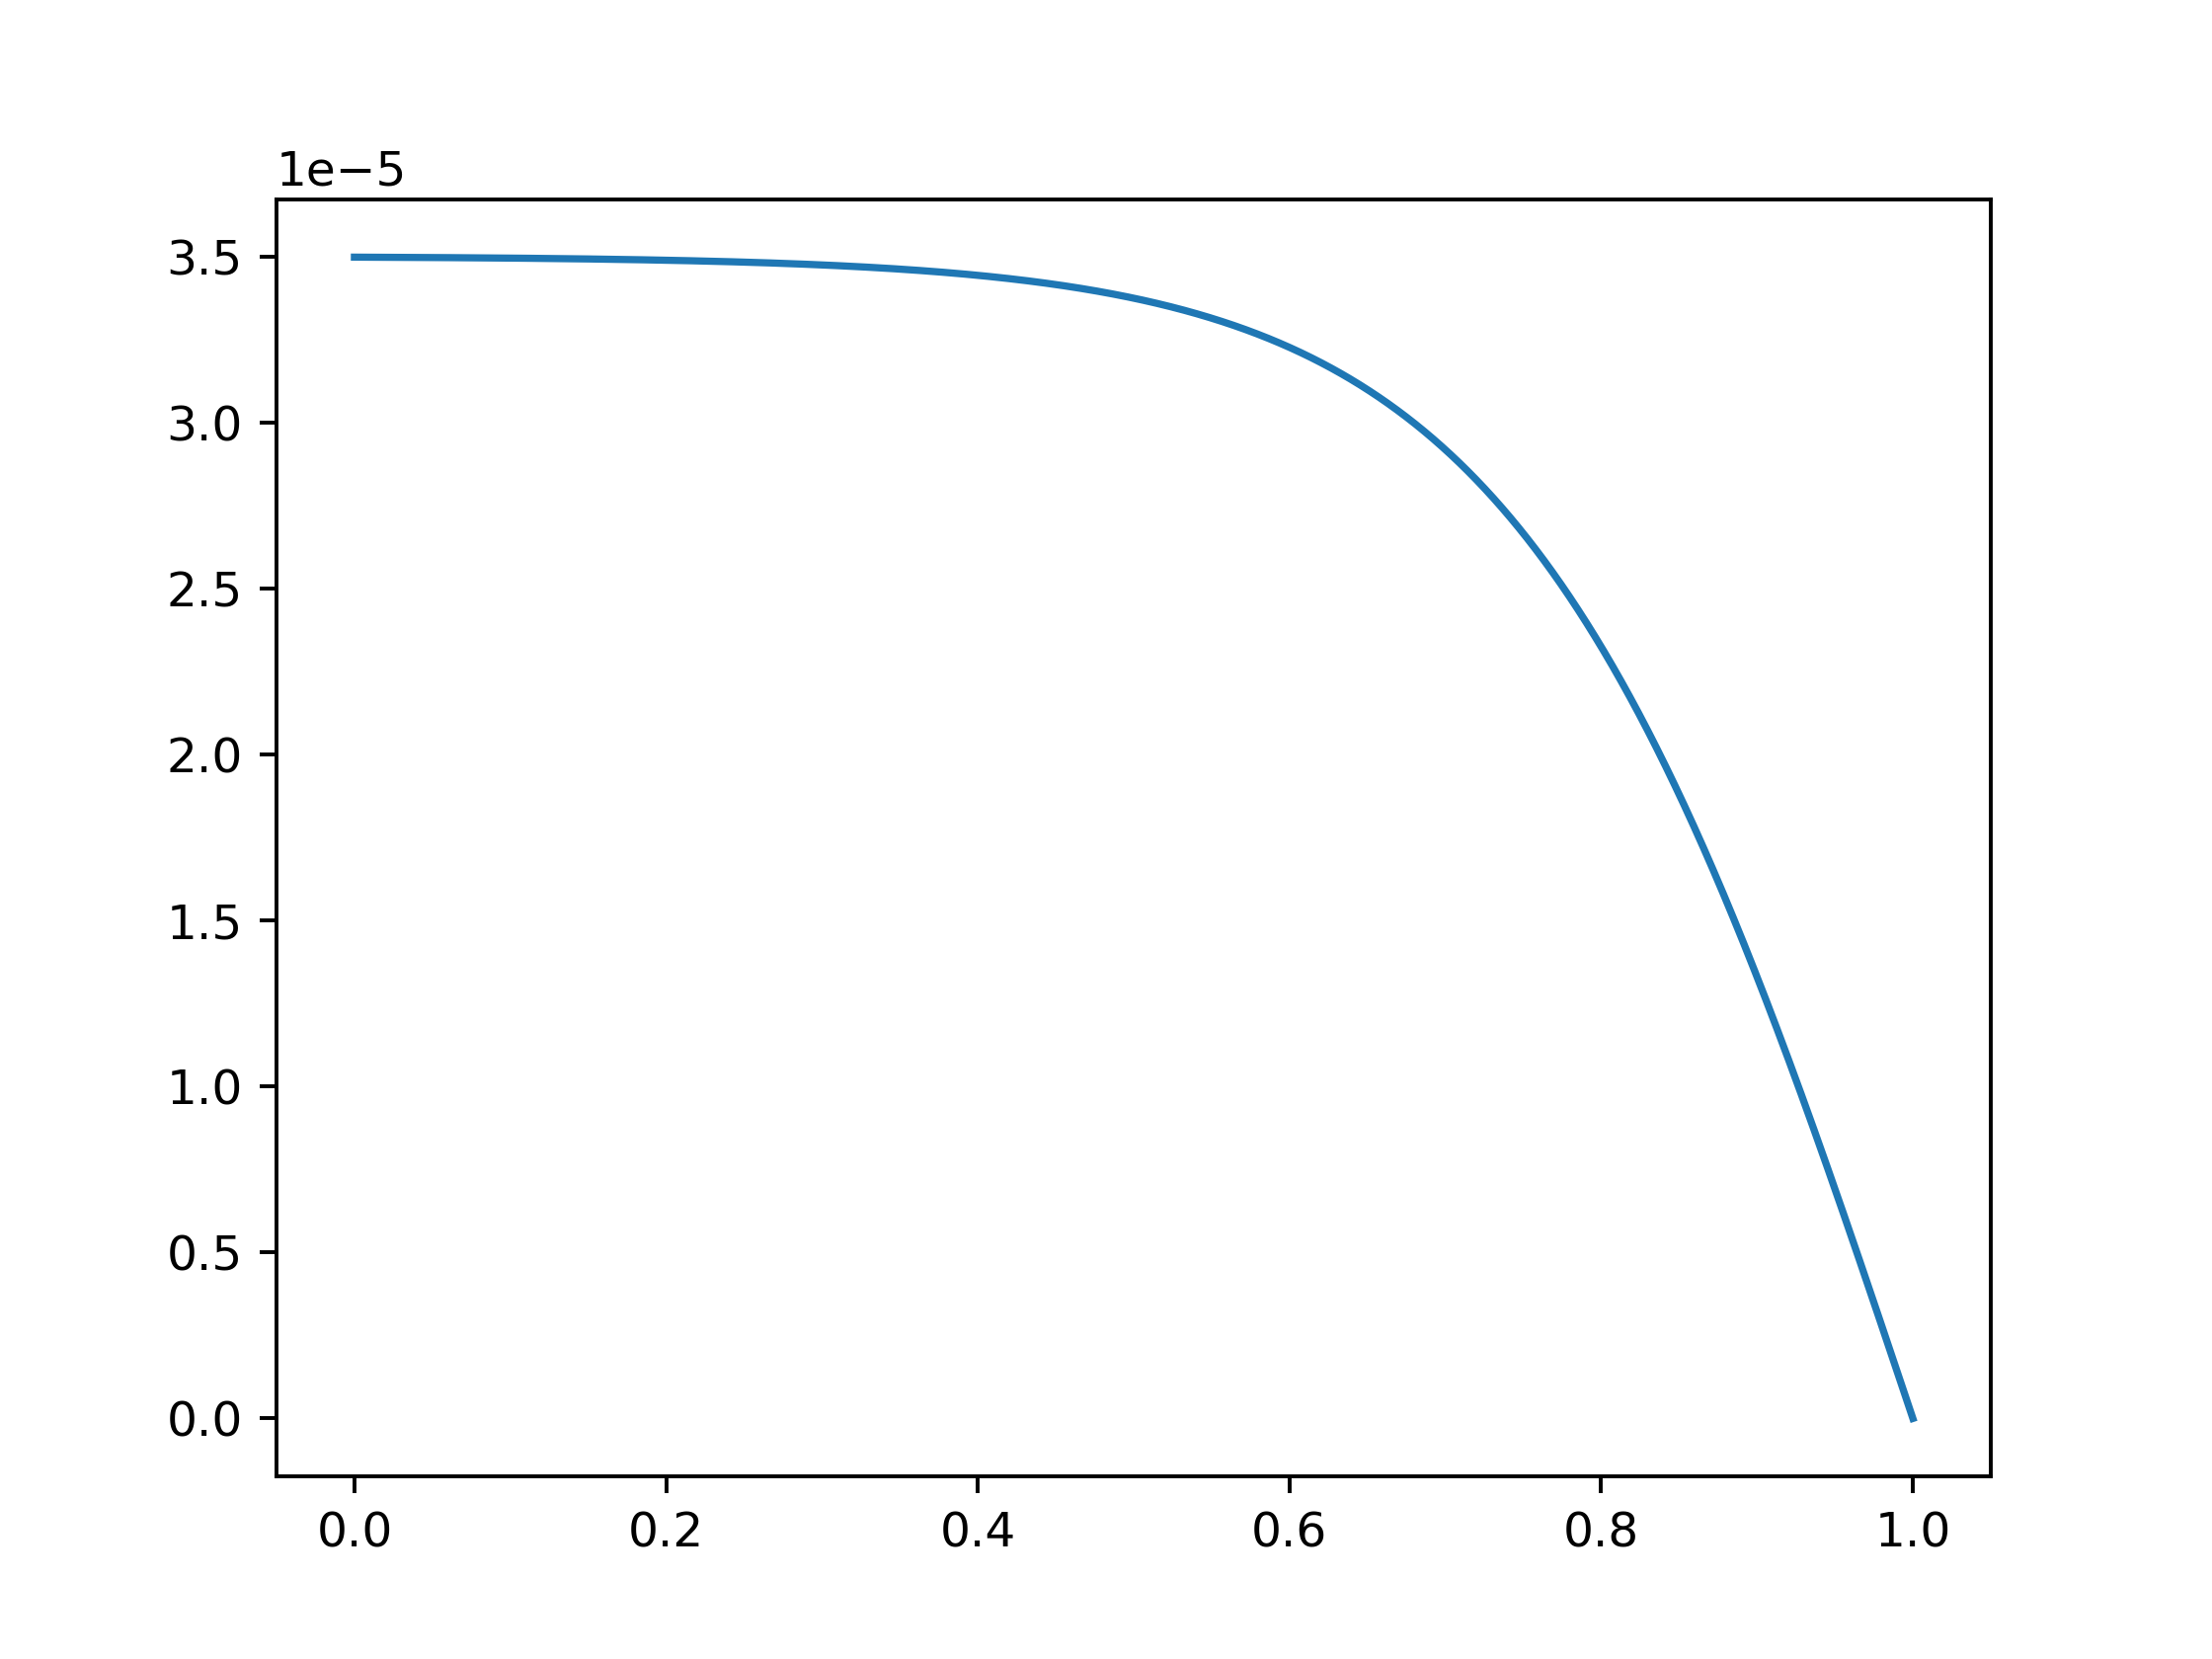

In [14]:
plt.figure()
plt.plot(reward_representation_xscale, reward_plateau_prob_f(reward_representation_xscale))

In [15]:
start_time = time.time()
current_weights_population = context.initial_weights_population
weights_pop_history = []
ramp_pop_history = []
pop_rep_density_history = []
prev_plateau_start_times = [[] for _ in range(context.num_cells)]
plateau_start_times_history = [prev_plateau_start_times]

In [16]:
len(current_weights_population)

500

In [17]:
type(current_weights_population[0])

numpy.ndarray

In [18]:
current_weights_population[0].shape

(200,)

<IPython.core.display.Javascript object>


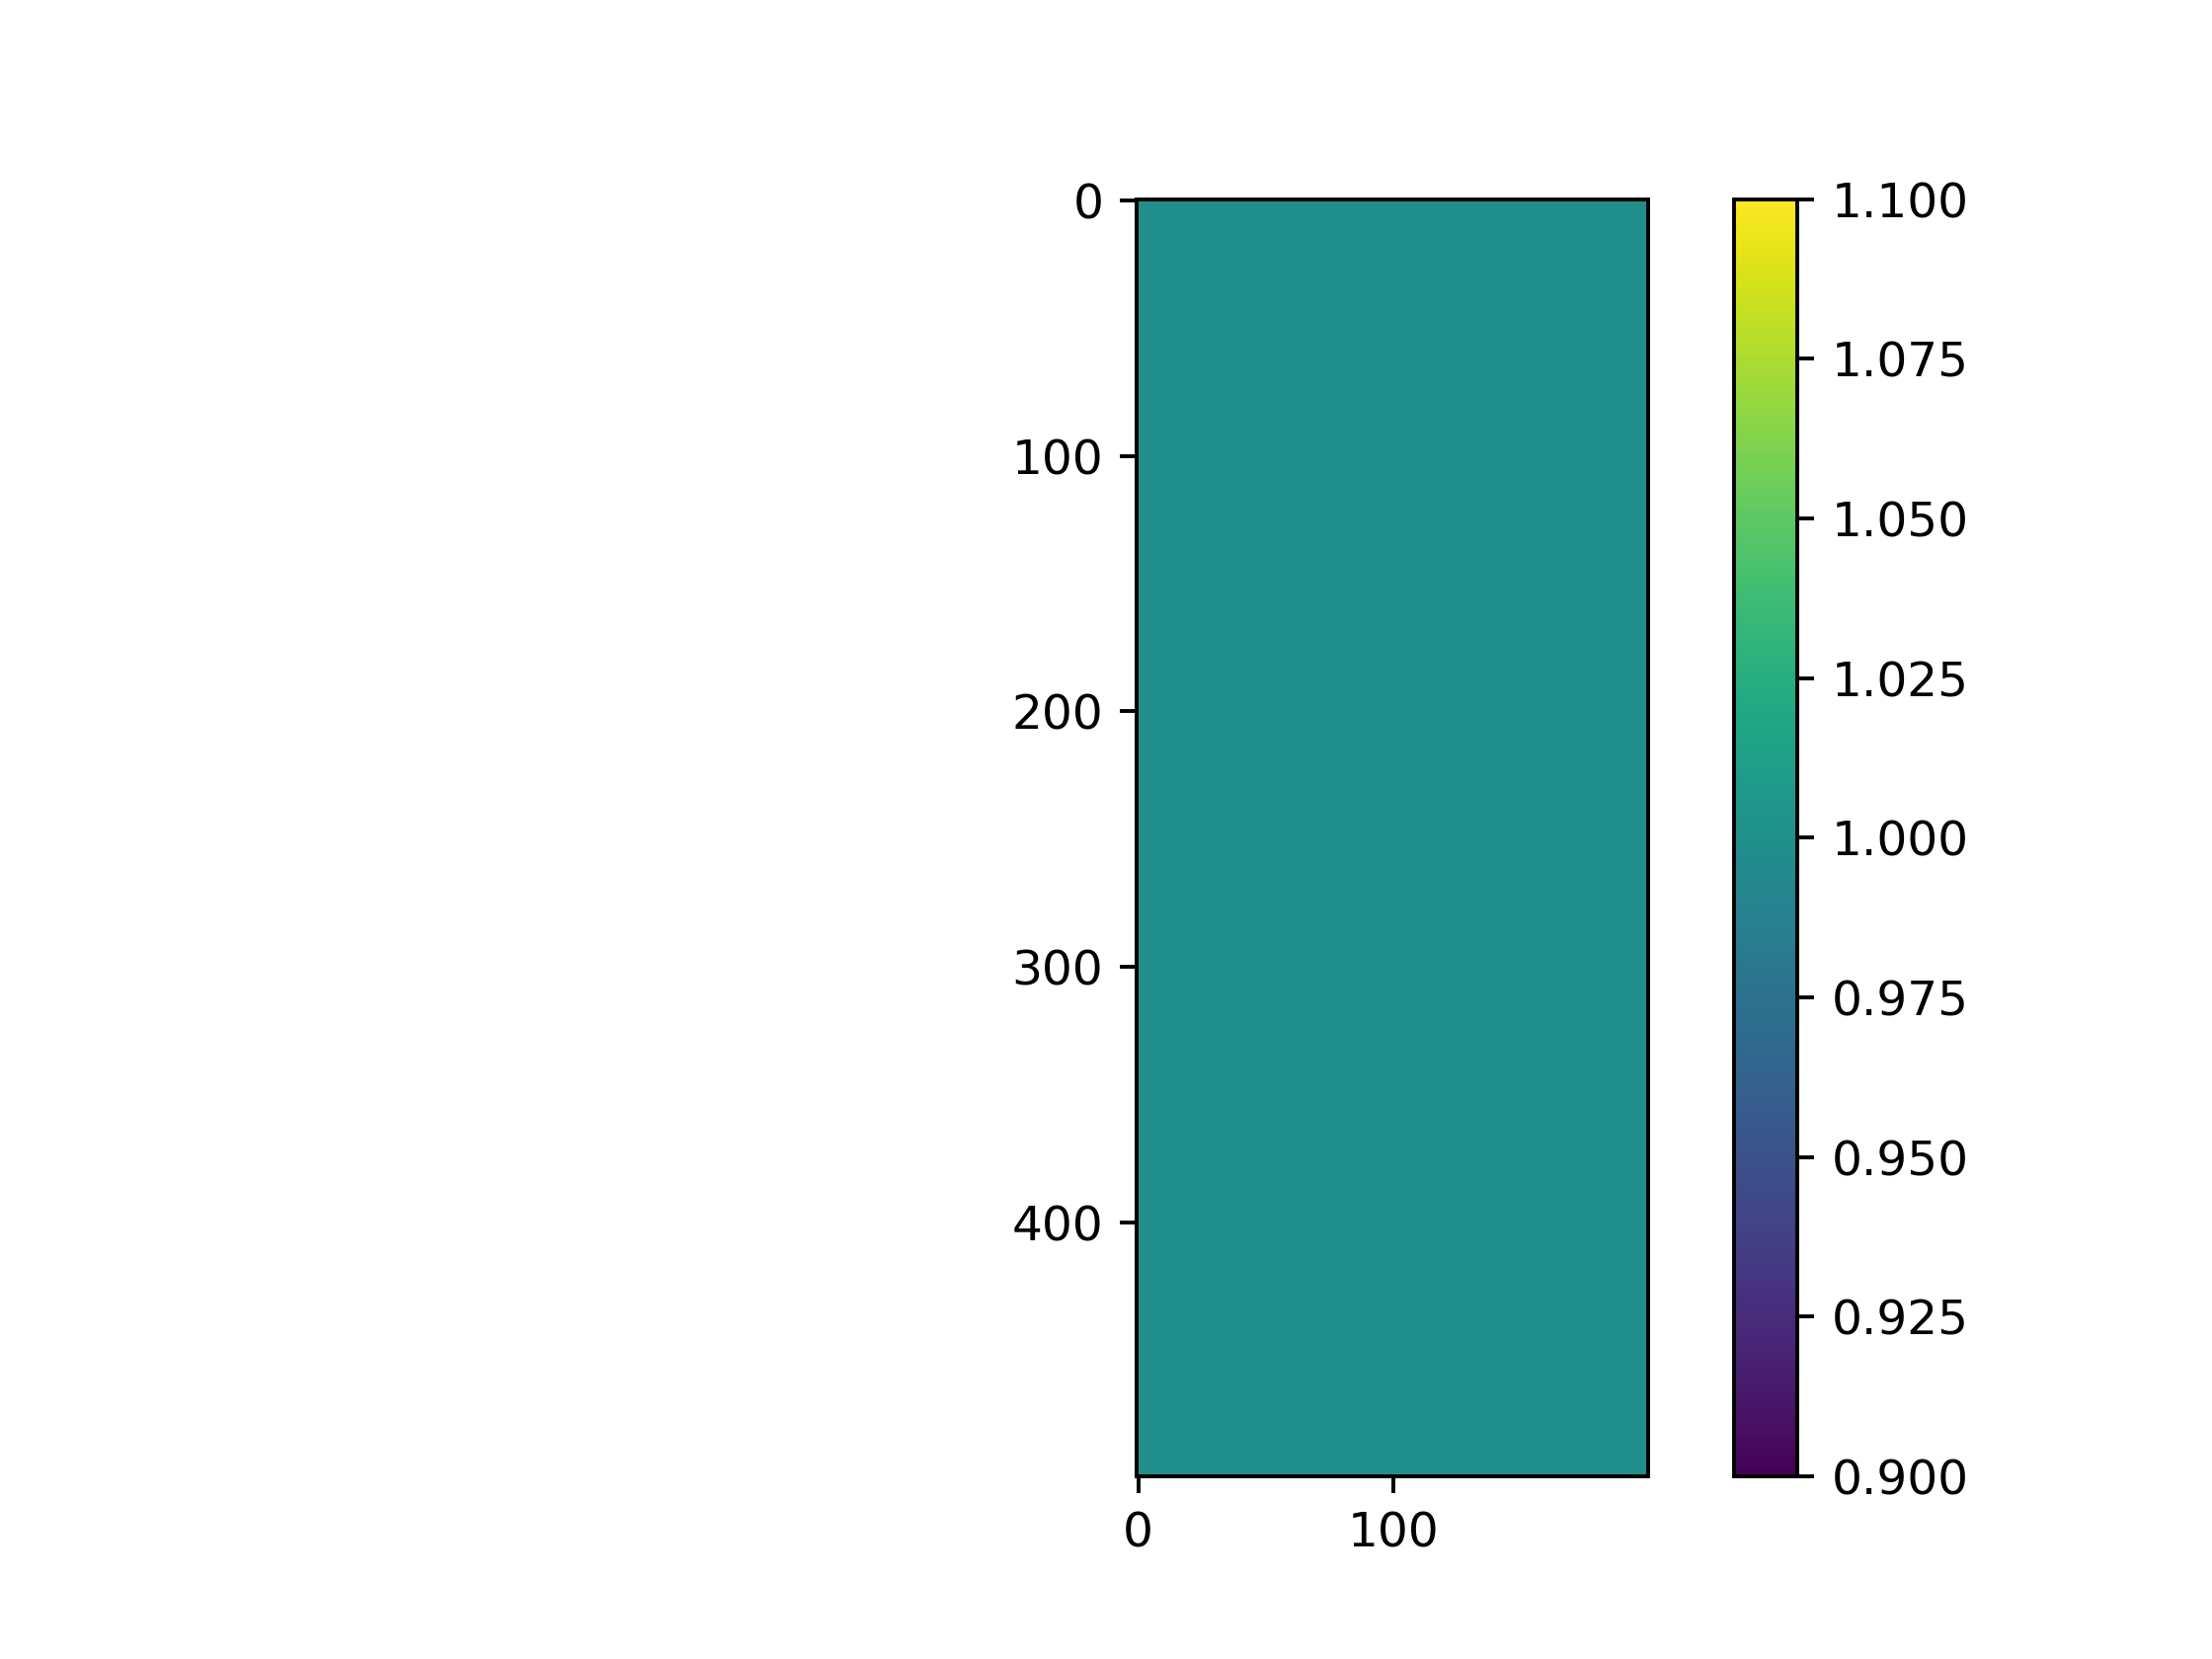

In [21]:
plt.figure()
plt.imshow(current_weights_population)
plt.colorbar()

In [22]:
lap = 1

In [23]:
weights_pop_history.append(current_weights_population)
current_ramp_population = context.interface.map(get_ramp, current_weights_population)

<IPython.core.display.Javascript object>


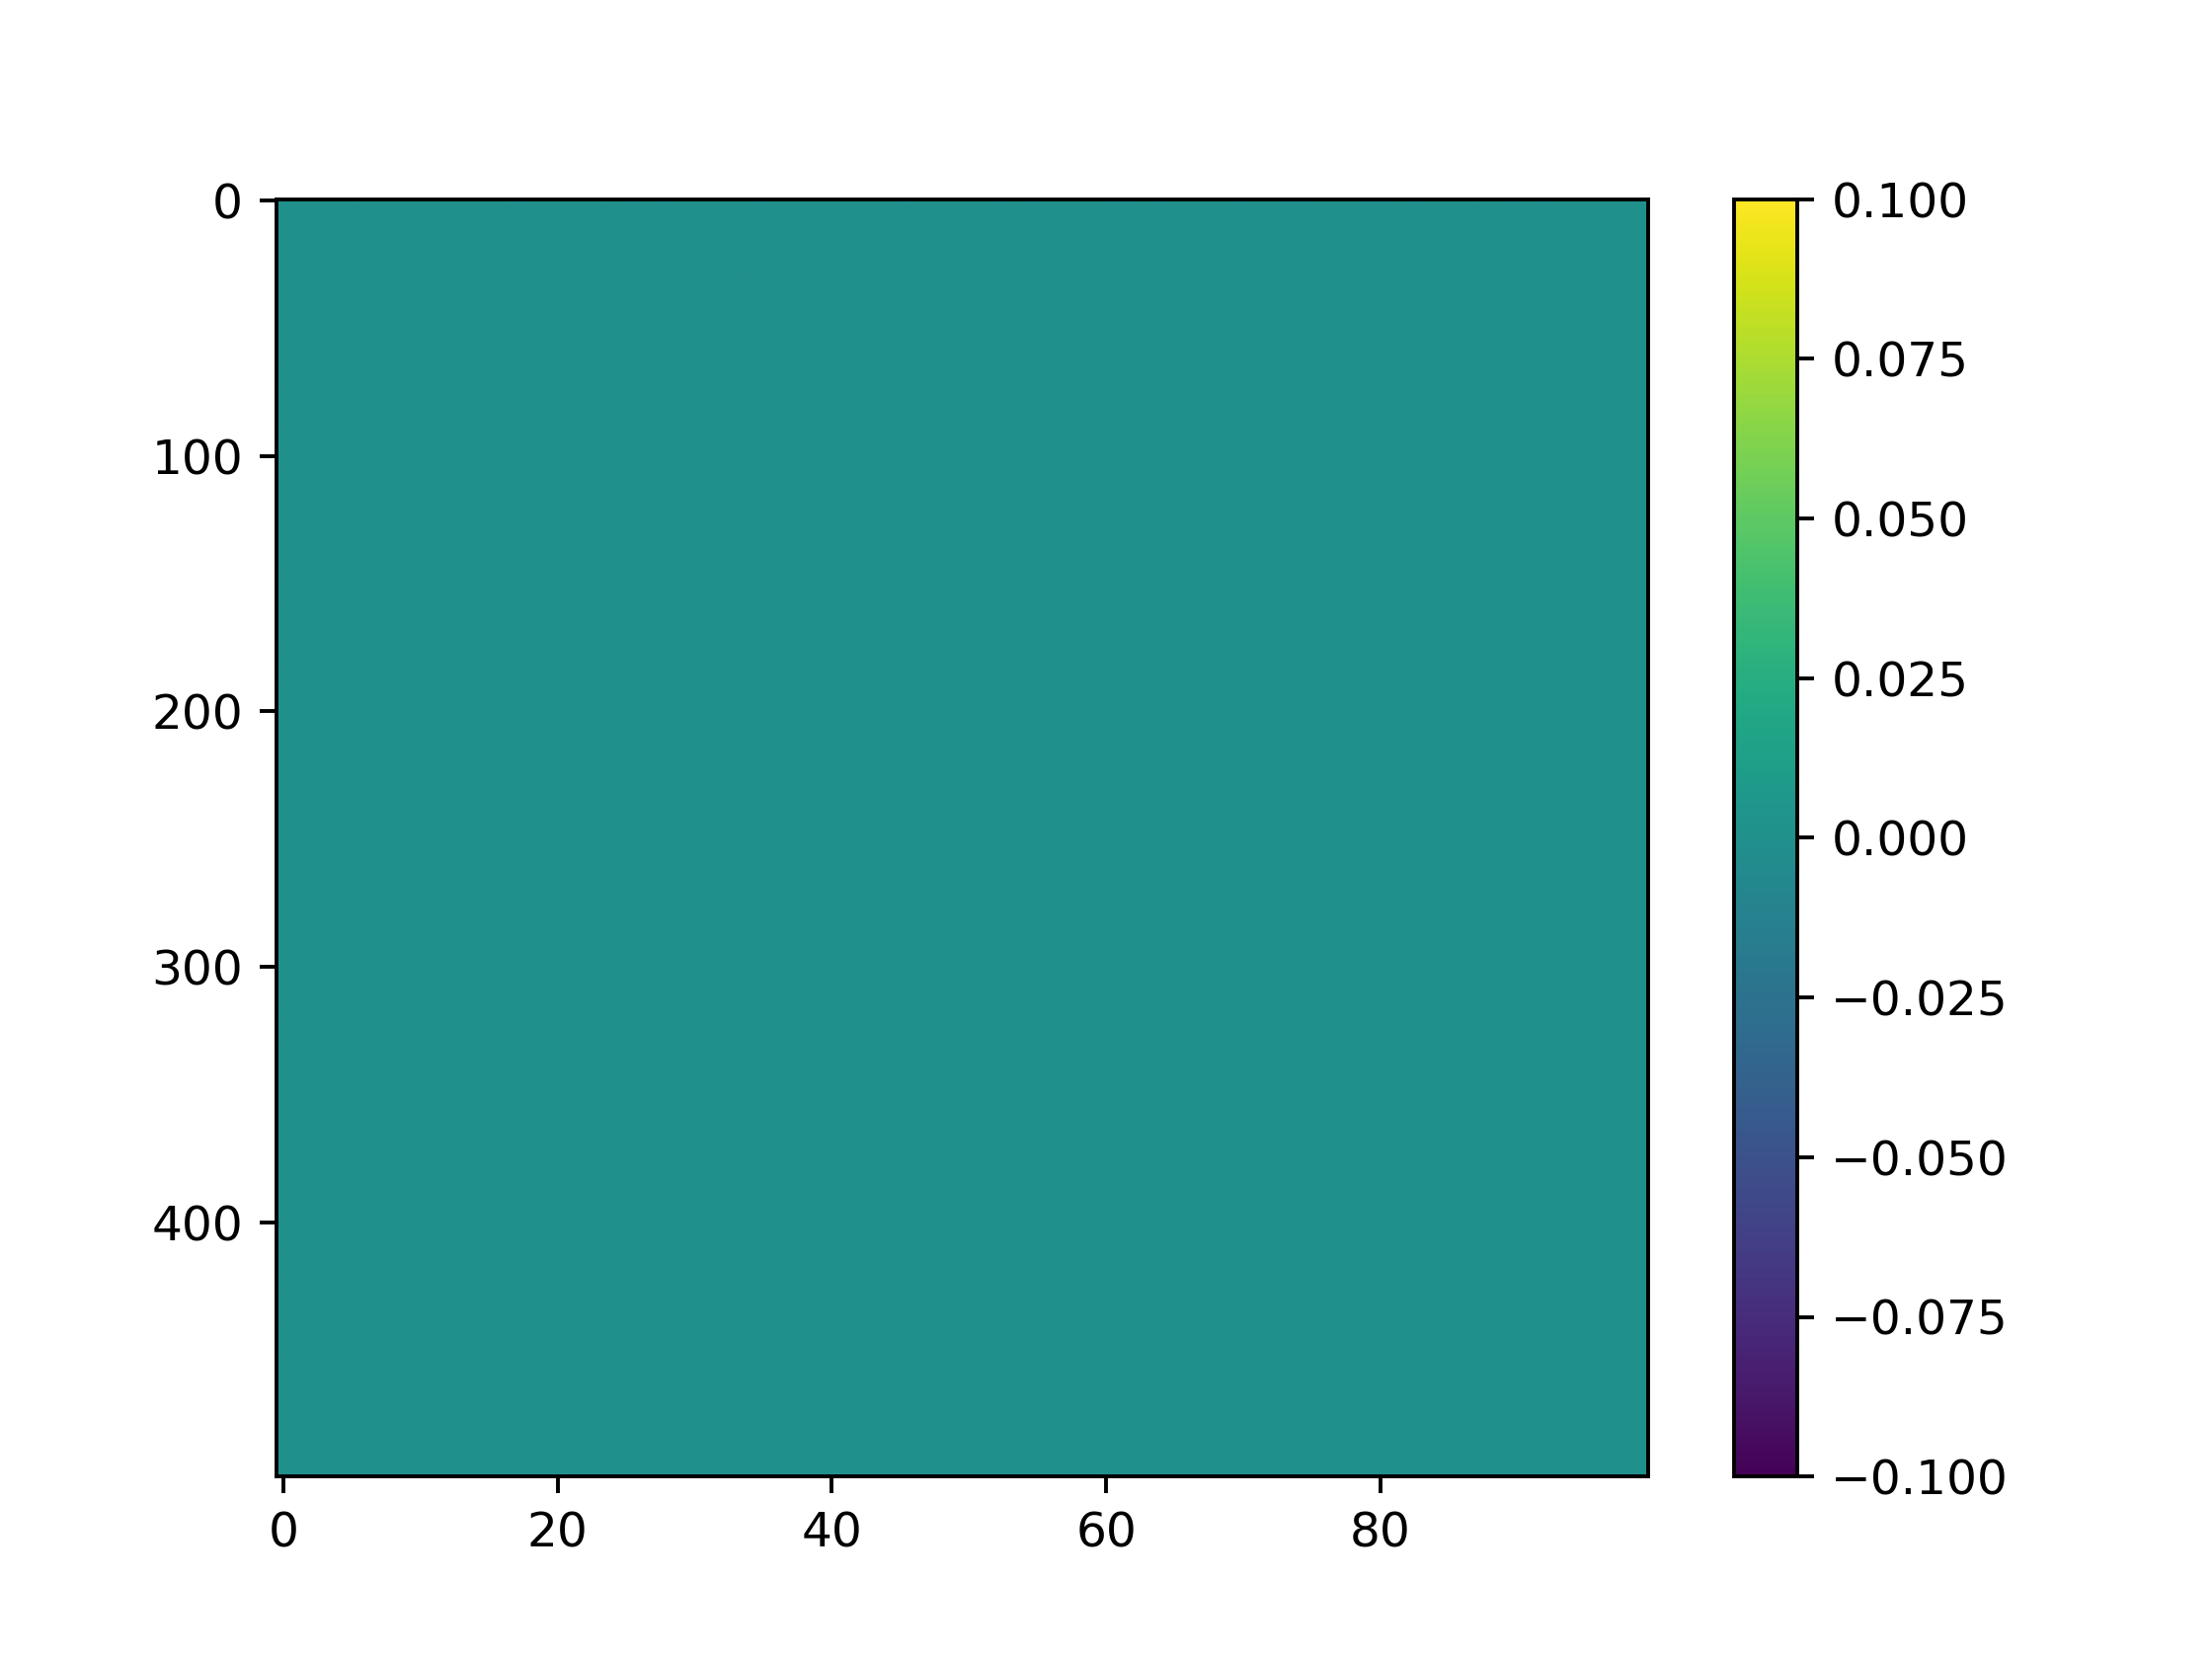

In [25]:
plt.figure()
plt.imshow(current_ramp_population, aspect='auto')
plt.colorbar()

In [26]:
ramp_pop_history.append(current_ramp_population)
current_pop_representation_density = \
            get_population_representation_density(current_ramp_population)
pop_rep_density_history.append(current_pop_representation_density)

<IPython.core.display.Javascript object>


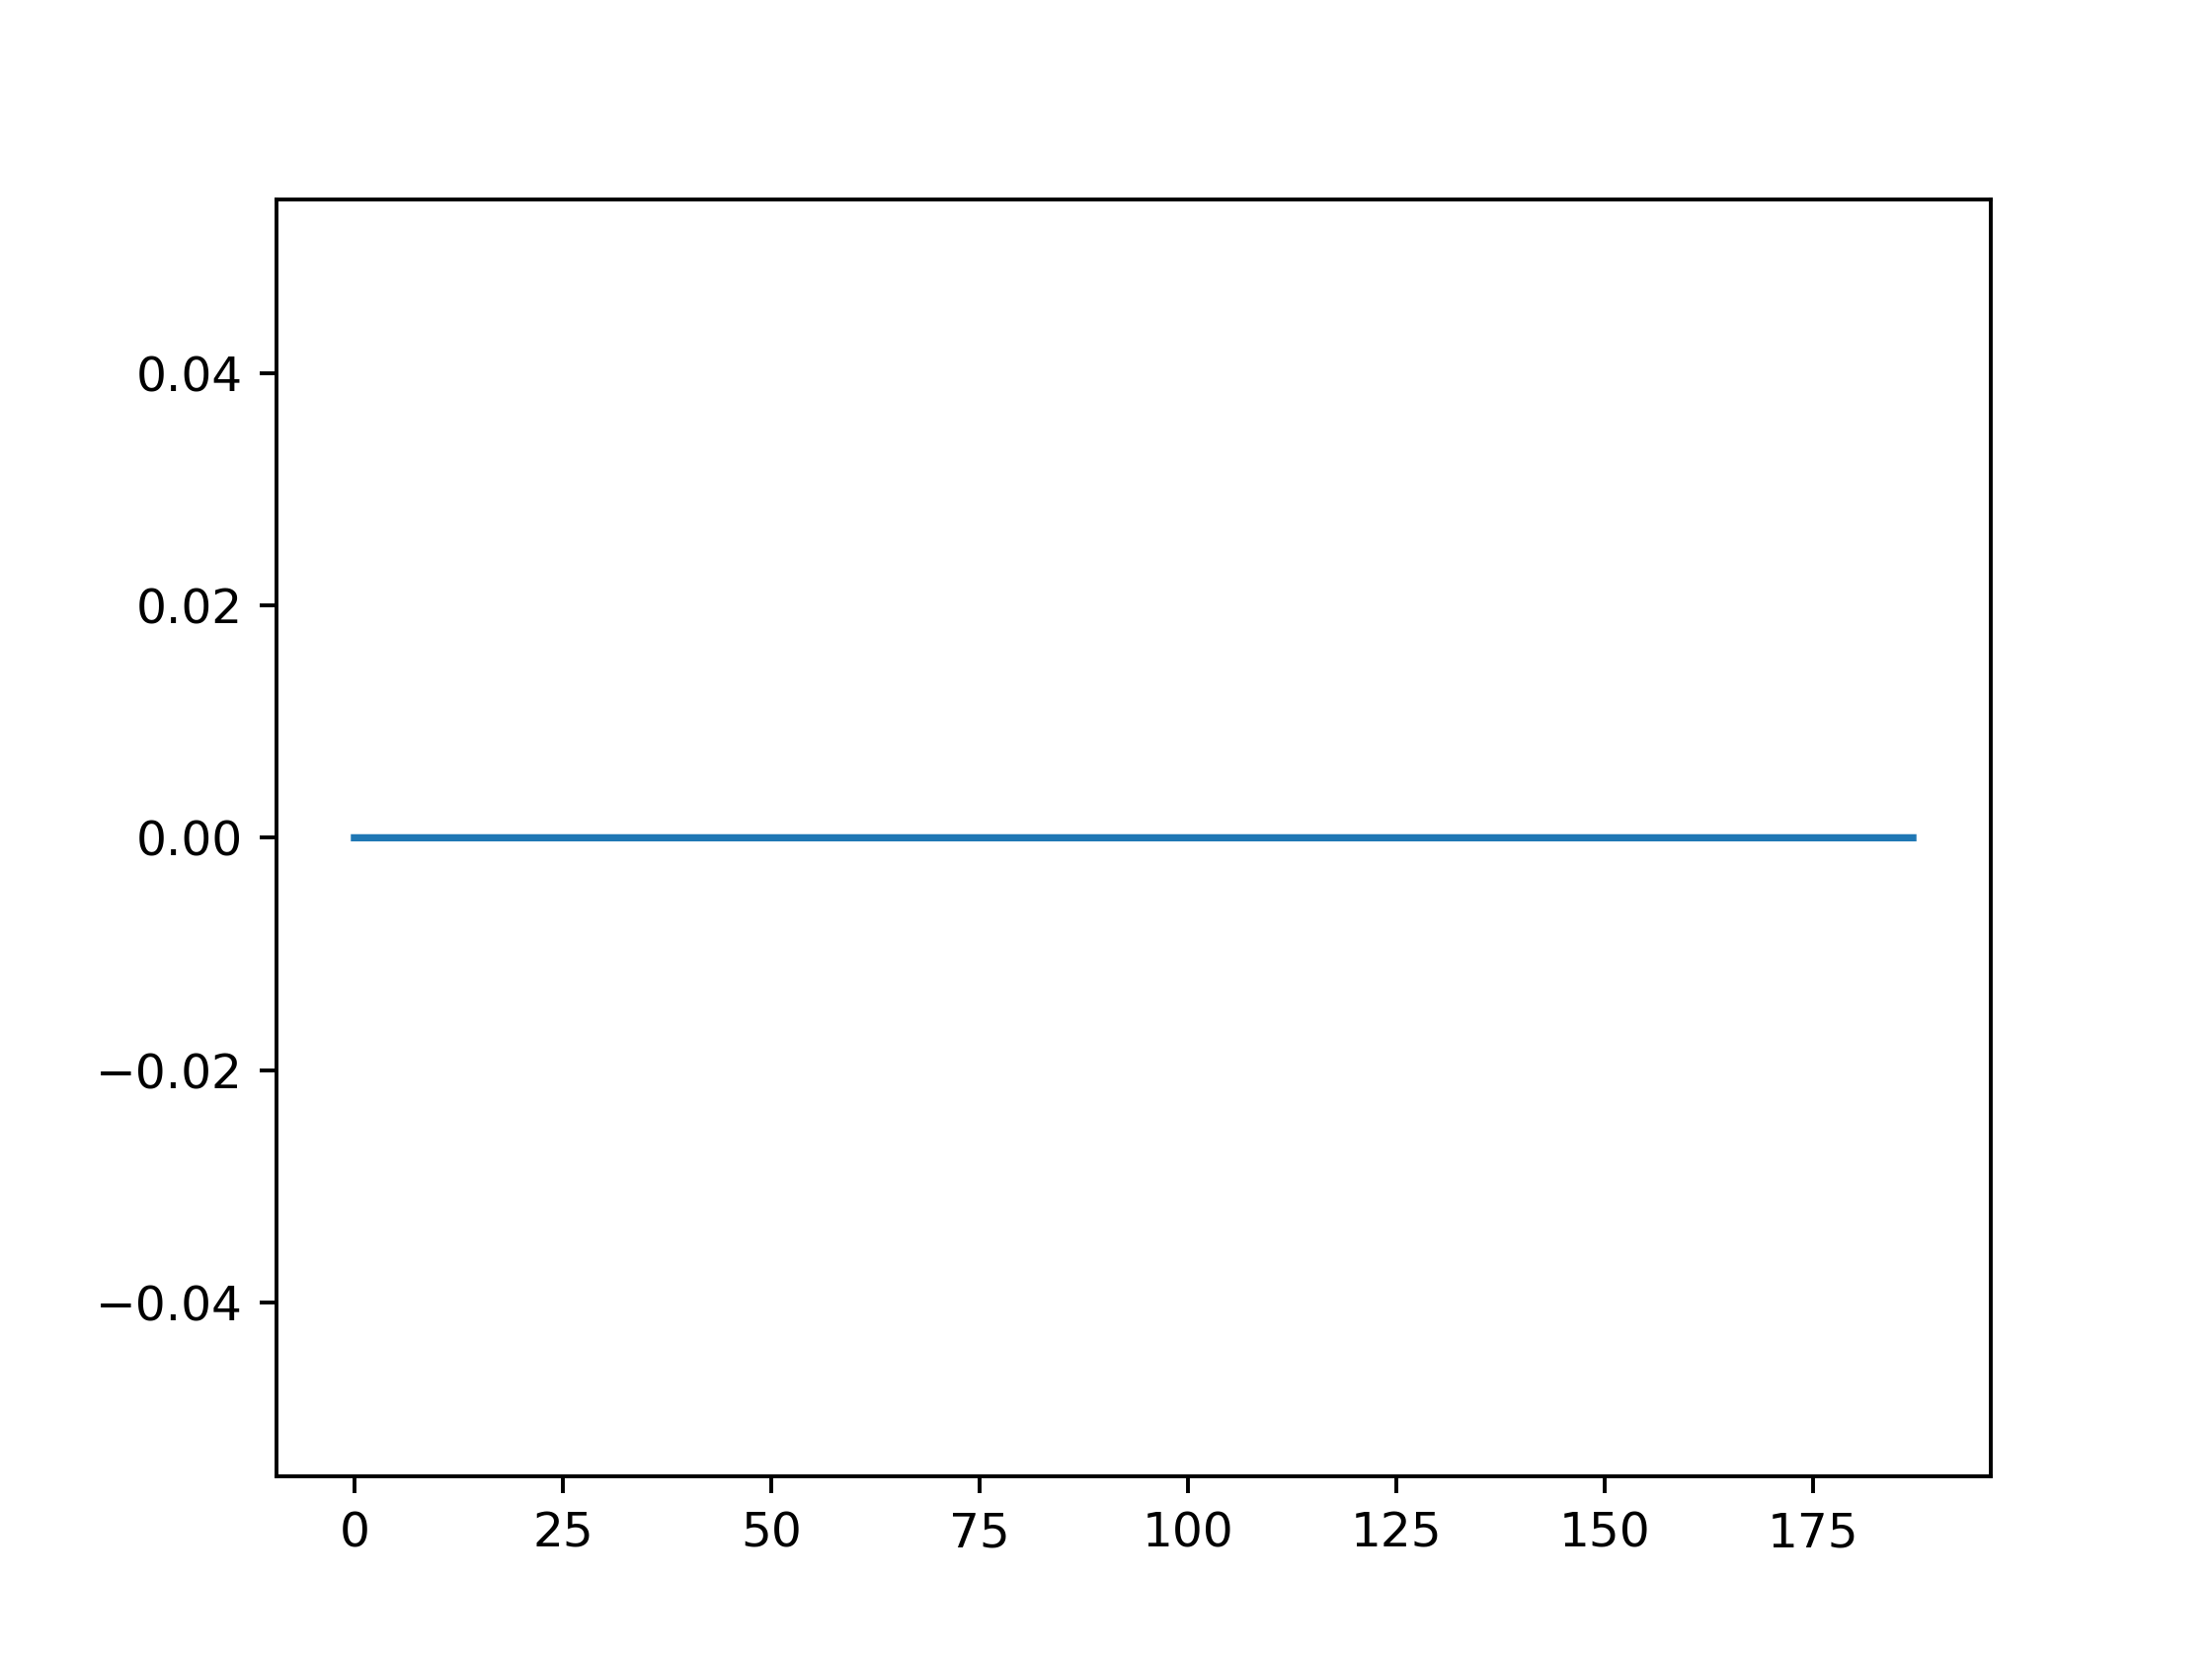

In [27]:
plt.figure()
plt.plot(default_interp_x, current_pop_representation_density)

In [28]:
prev_plateau_start_times

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],


In [29]:
sequences = [current_ramp_population] + [[current_pop_representation_density] * context.num_cells] + \
                    [prev_plateau_start_times] + [[lap] * context.num_cells]
pop_plateau_probability = context.interface.map(get_plateau_probability, *sequences)

In [36]:
t_start_time = context.lap_start_times[lap]
this_t = np.add(np.append(context.default_interp_t,
                          context.default_interp_t + len(context.default_interp_t) * context.dt),
                t_start_time)
len(this_t), len(pop_plateau_probability[0])

(12466, 12466)

<IPython.core.display.Javascript object>


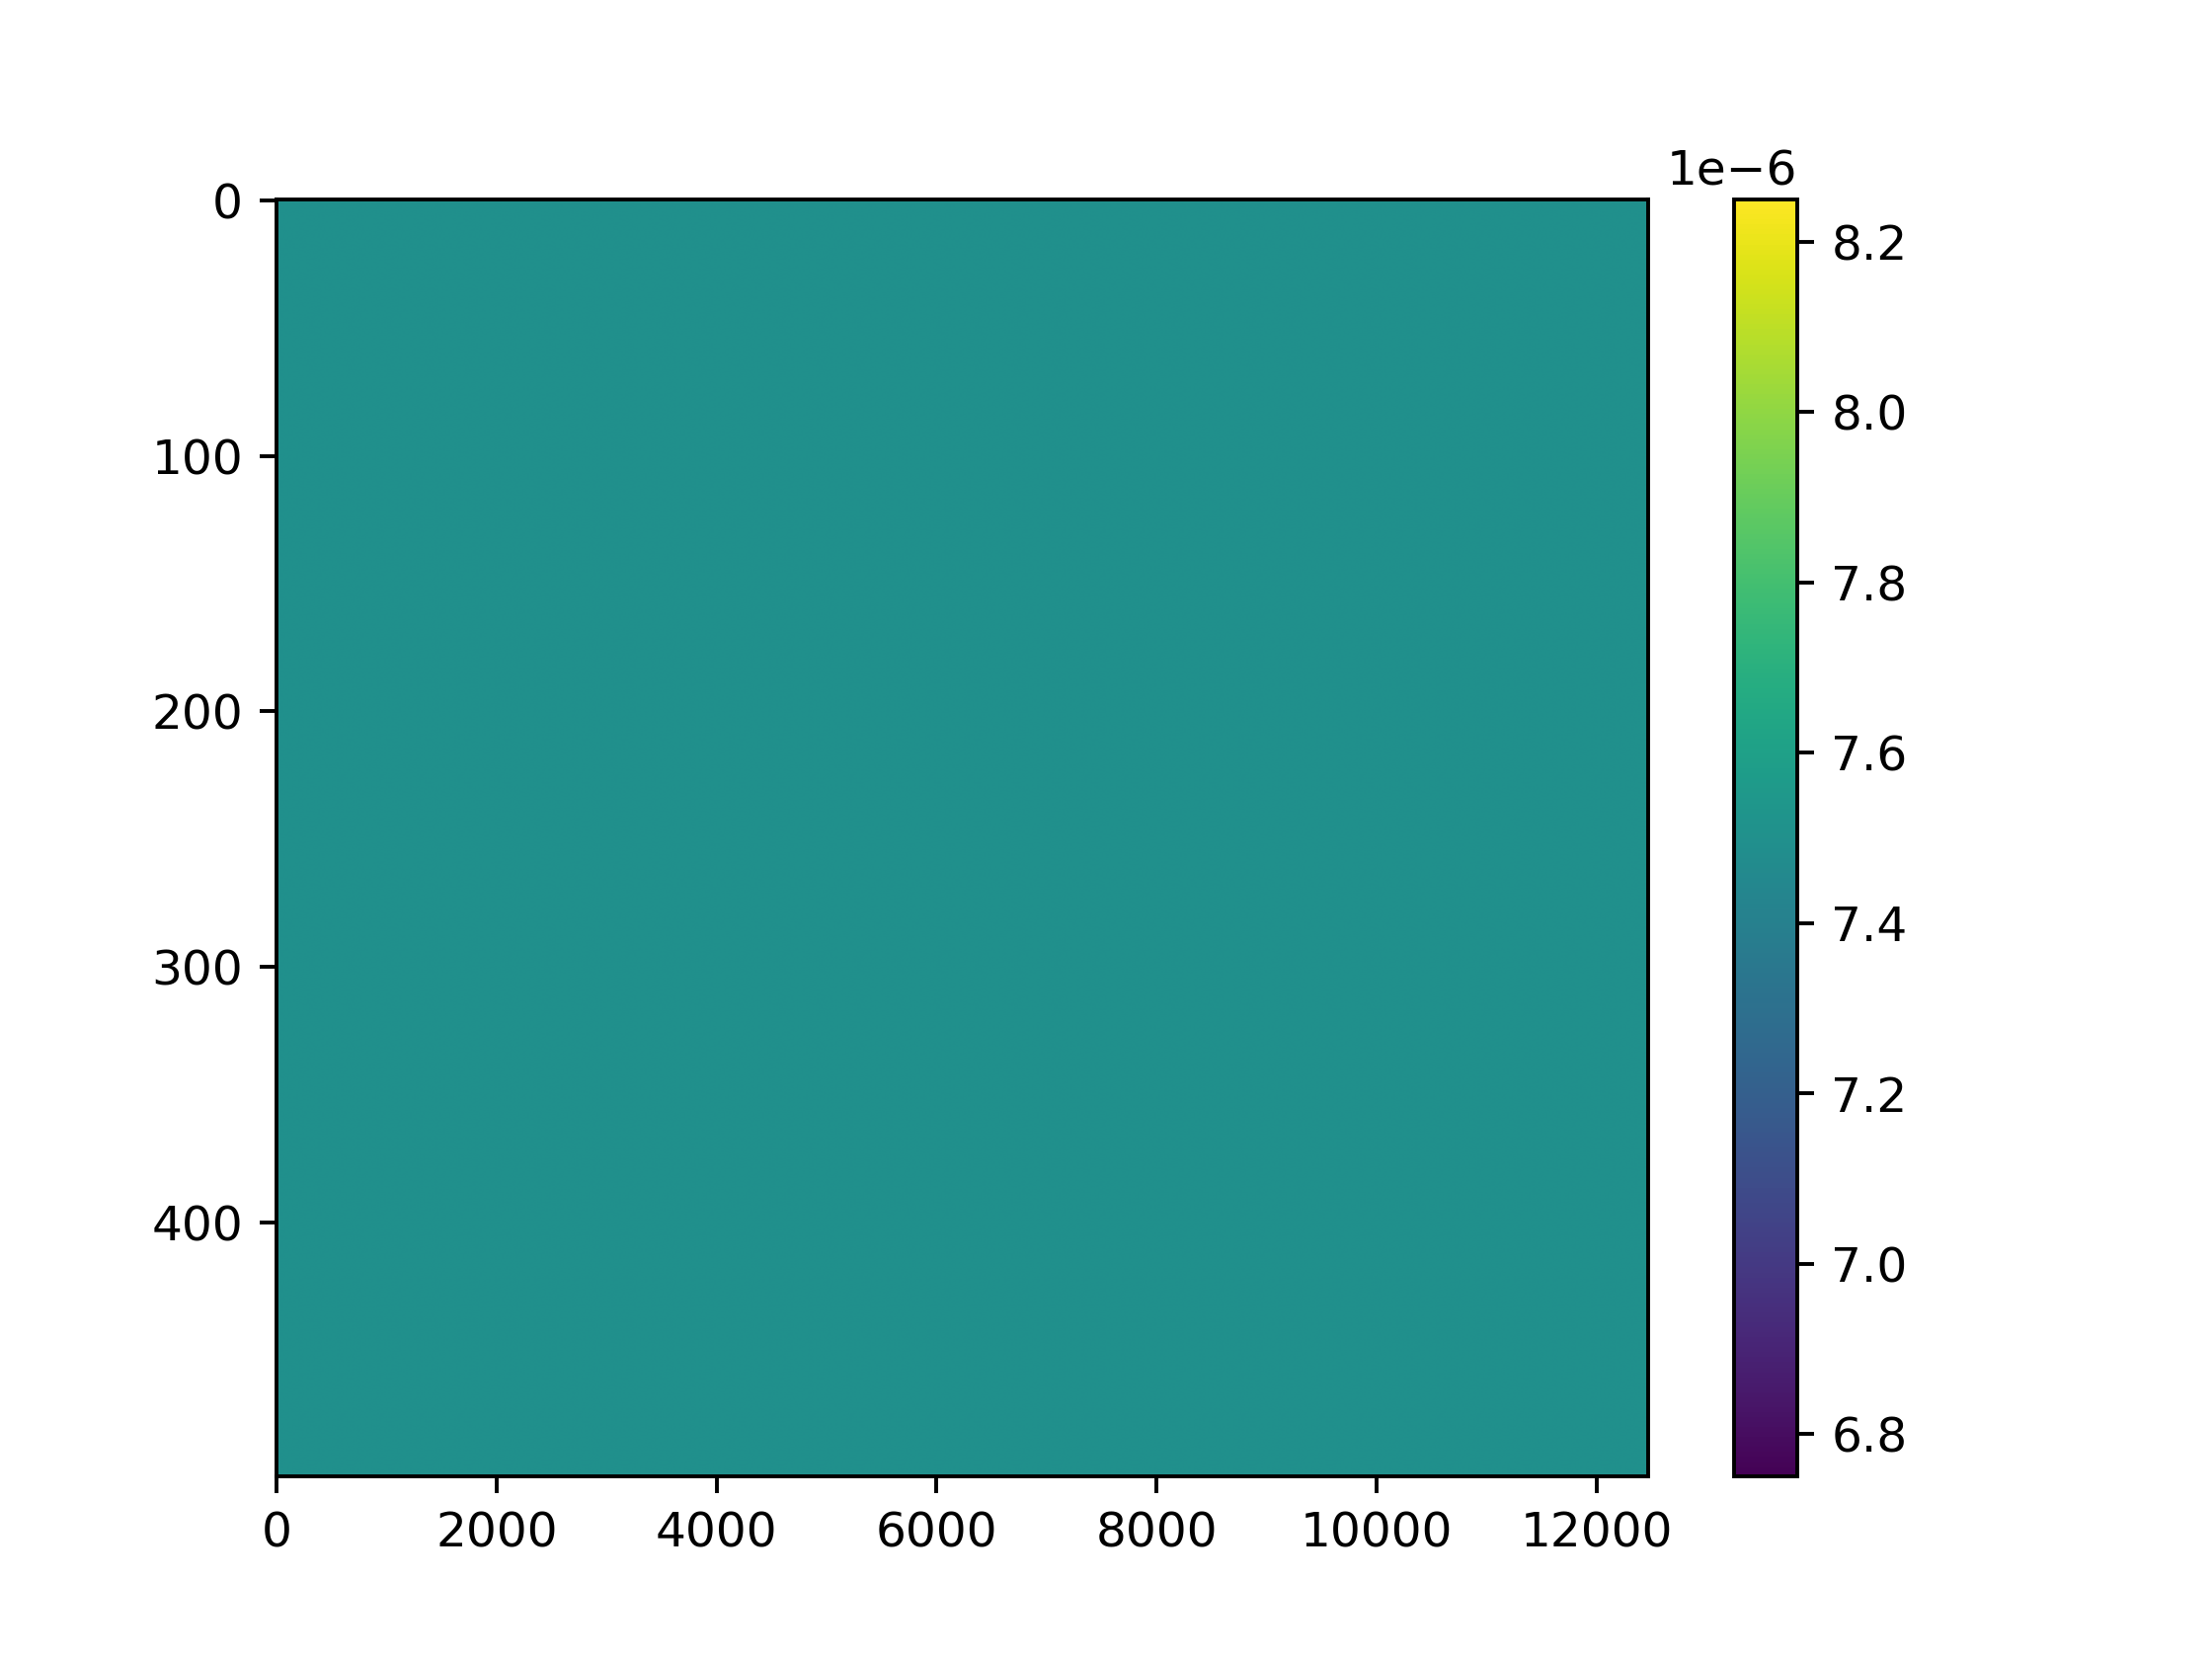

In [39]:
plt.figure()
plt.imshow(pop_plateau_probability, aspect='auto')
plt.colorbar()

In [40]:
sequences = [pop_plateau_probability] + [[lap] * context.num_cells] + [list(range(context.num_cells))]
plateau_start_times = context.interface.map(get_plateau_times, *sequences)
plateau_start_times_history.append(plateau_start_times)

In [41]:
plateau_start_times

[[],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [4879.0],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [8980.0],
 [],
 [],
 [],
 [],
 [5961.0],
 [],
 [],
 [],
 [],
 [],
 [9703.0],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [8587.0],
 [],
 [],
 [],
 [3020.0],
 [],
 [10321.0],
 [],
 [11711.0],
 [],
 [],
 [],
 [6824.0],
 [],
 [4769.0, 11623.0],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [5117.0],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [2119.0],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [5888.0],
 [],
 [],
 [10491.0],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [],
 [8313.0],
 [],
 [],
 [10378.0],
 [3286.0],
 [],
 [],


In [42]:
sequences = [current_weights_population] + [plateau_start_times] + [[lap] * context.num_cells]
current_weights_population = context.interface.map(update_weights, *sequences)
prev_plateau_start_times = plateau_start_times

<IPython.core.display.Javascript object>


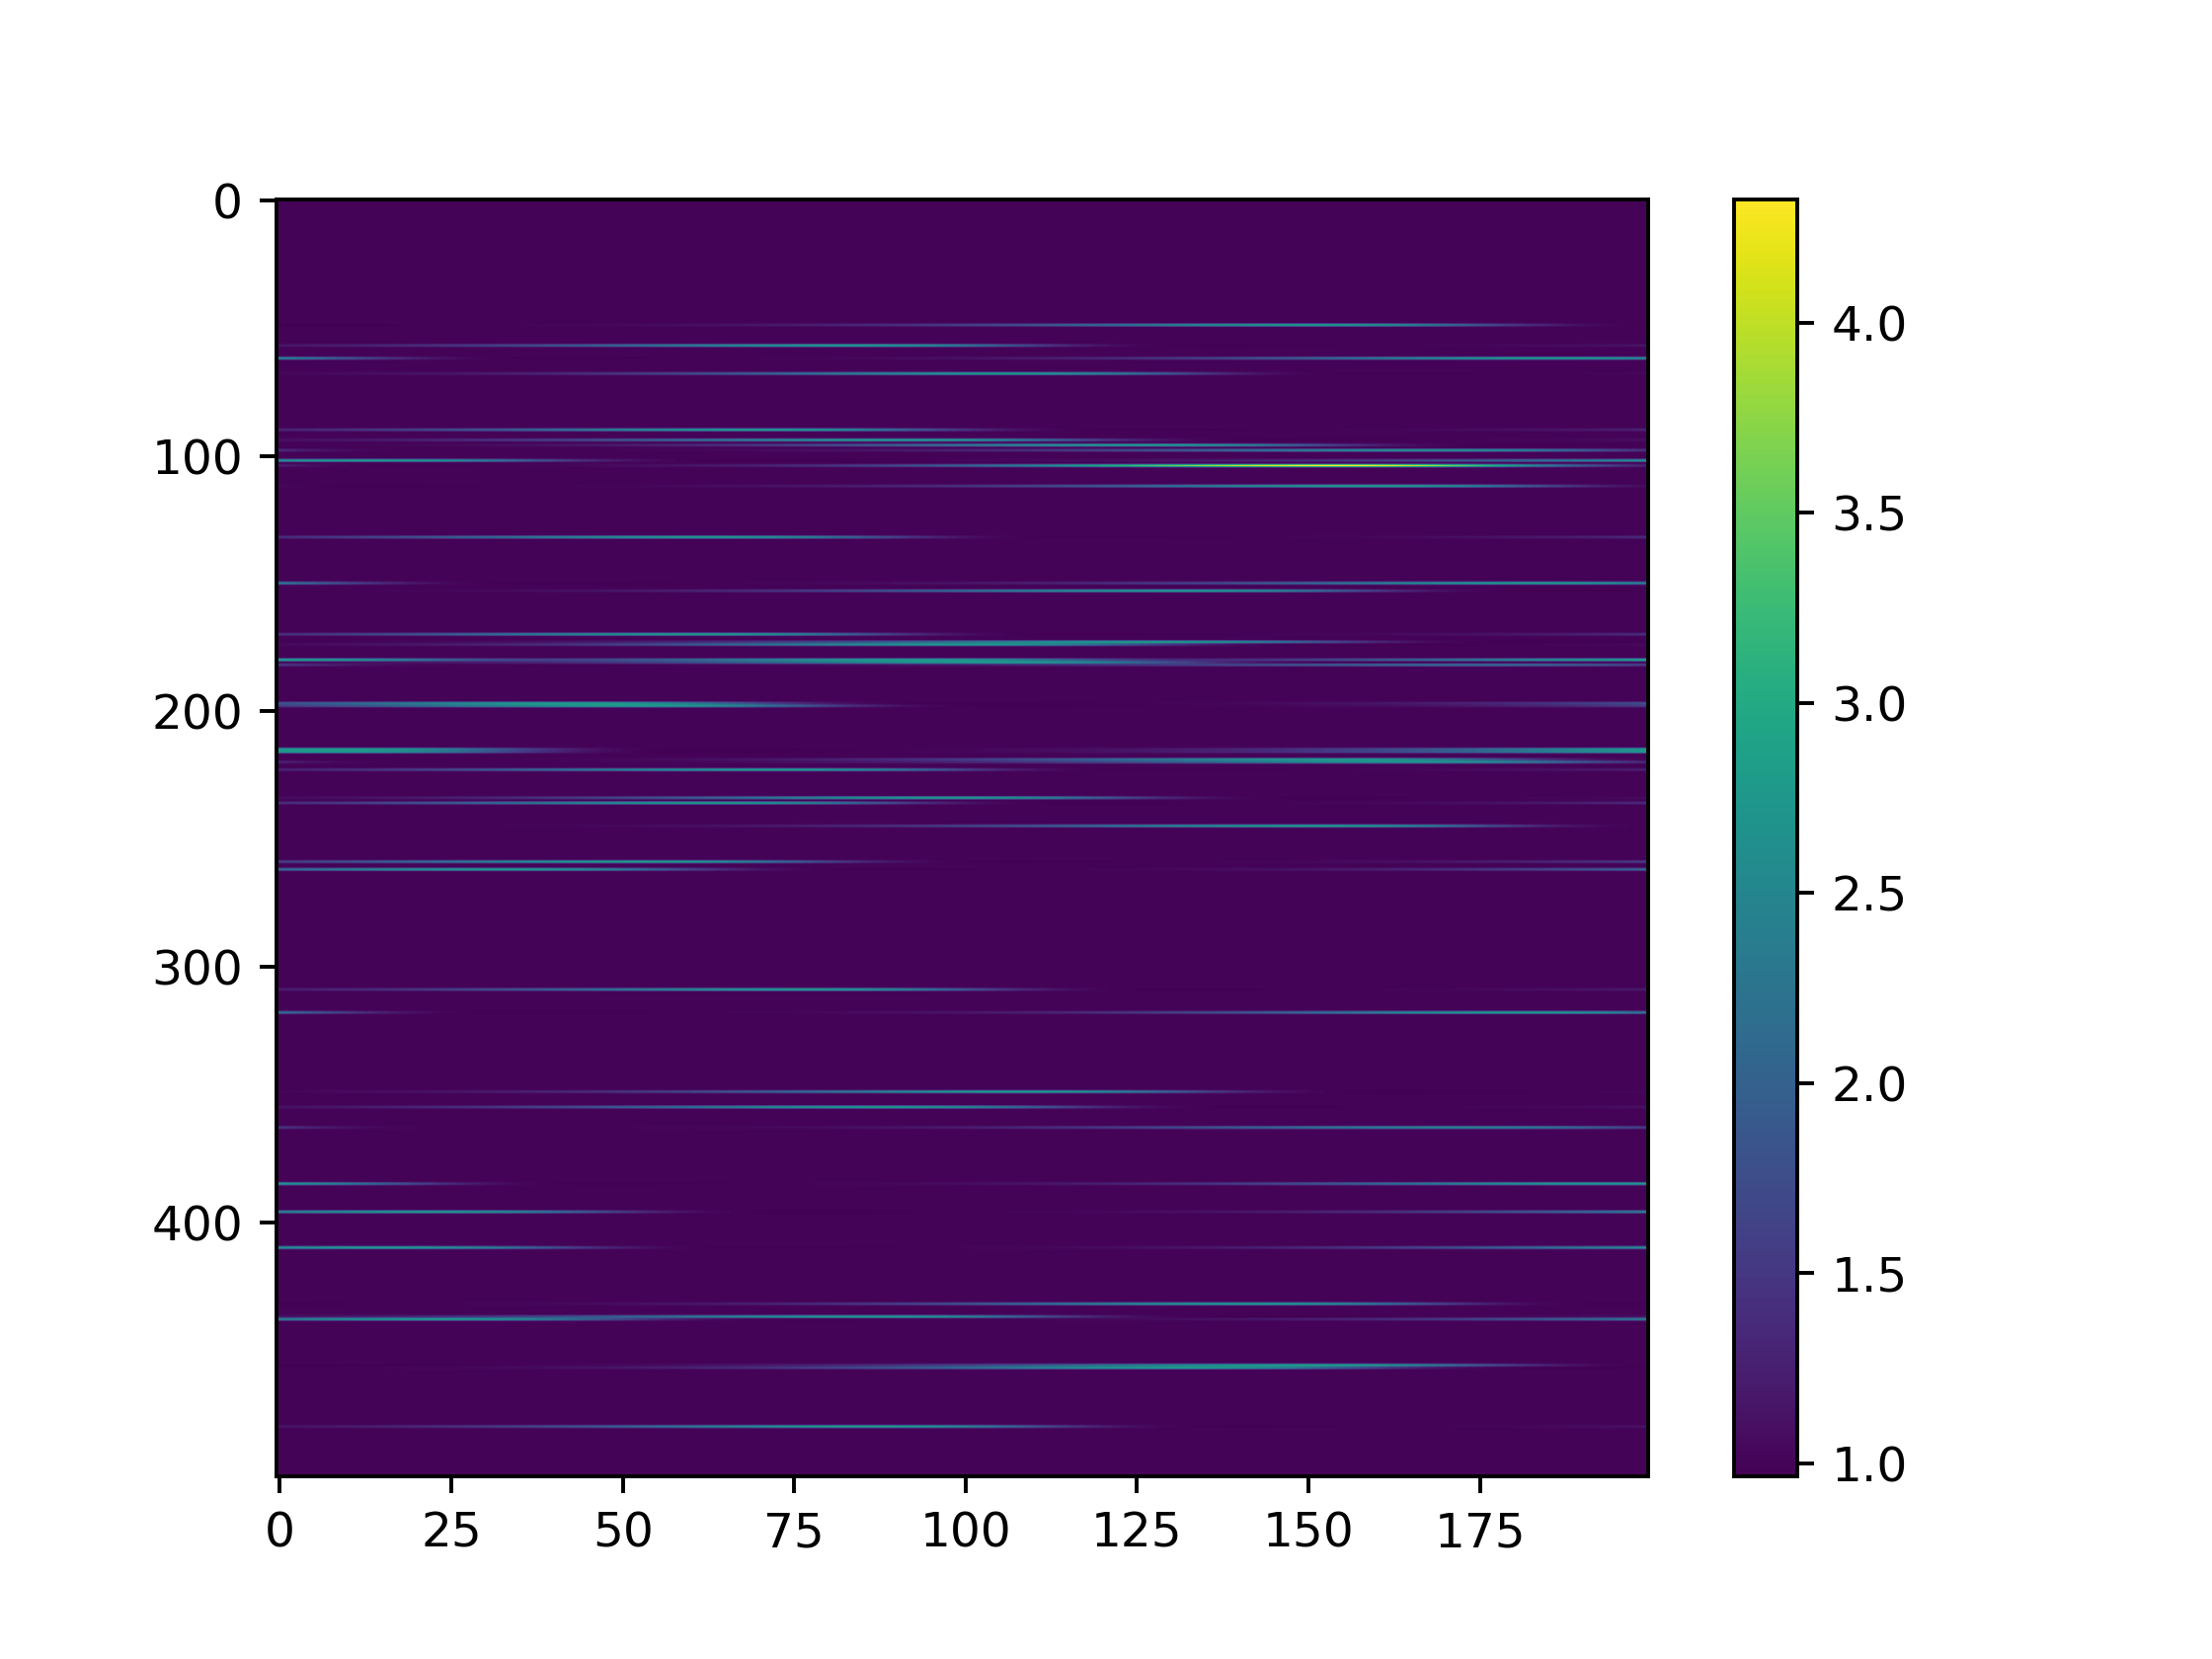

In [43]:
plt.figure()
plt.imshow(current_weights_population, aspect='auto')
plt.colorbar()